# Stress/Strain analysis updated

This notebook contains some updates to the stress strain analysis that need to be incorporated. Conceptually nothing has changed, but there are some crucial details that need to ironed out and tidied. 

## Details:
- The height offset between the reference stack and the imaging stack has been determined and no longer needs to be approximated: the offset is 0.15(937 - 163)=116.1 um which was obtained by matching the slice number 937 in the reference stack to slice 163 in the imaging stack by comparing the center of a particle in the bulk of the gel. 
- The local strain measure is corrupted by some garbage strain values obtained when the particle coordination is too low. Typically, the strain computaiton will fail if the coordination is not high enough giving NAN values for the local strain (and recording the nnb value) however occassionally it reports a number even for very low coordinations of 1 or 2 that can span the entire range of float values. Excluding strain values on nnb > 4 or nnb >9 gets rid of this problem and improces the match between volume average strain and the strain obtained from displacement of the boundaries 
- The strain measures are going to be computed in the basis of (|| and $\perp$ direction of the plate displacement. This is essentially the x direction, but there is a small correction that will be applied. This is done in order to rule out misalignment concerns when I analyze the stress/strain curve in the applied and perpendicalr directions. My currnet hypothesis is that direction the plate moves doesnt matter, and instead the sample is going to deform on the most compliant shear directions available in the sample. I am not really doing small strain mechanical testiing of the colloidal glass, but rather probing the internal stresses and packing in the glass with weak shear perturbations and the role of displacing the plate is to inject sufficient mechanical energy to drive transformations without introducing a strain directional bias in the case of small strain against a rigid boundary.
- carry out stress/strain analysis in perp and parralell directions of the plate motion. 

In [1]:
import sys
sys.path.extend(['/Users/zsolt/Colloid_git/TractionRheoscopy'])
from data_analysis import static as da
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from importlib import reload

In [185]:
reload(da)

<module 'data_analysis.static' from '/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py'>

In [4]:
experiment = da.loadExperiment()
#experiment.keys()
sedPos = experiment['sedPos']
sedStrain_traj = experiment['sedStrain_traj']
gelPos = experiment['gelPos']

In [7]:
sedStrain_traj.head()

(0,1)     (0,2)     (0,3)     (0,4)     (0,5)  (0,6)  \
particle values                                                            
1        D2_min  0.091007  0.151544  0.160599  0.112302  0.089856    NaN   
         exx     0.011591 -0.038838 -0.029463 -0.019457 -0.016845    NaN   
         exy    -0.010121 -0.003519 -0.015082 -0.020948  0.003042    NaN   
         exz    -0.007984 -0.009392 -0.014228  0.012680 -0.003678    NaN   
         eyy     0.008537 -0.004854 -0.010697 -0.037893 -0.034701    NaN   

                 (0,7)  (0,8)  (0,9)  (0,10)  ...  (0,80)  (0,81)  (0,82)  \
particle values                               ...                           
1        D2_min    NaN    NaN    NaN     NaN  ...     NaN     NaN     NaN   
         exx       NaN    NaN    NaN     NaN  ...     NaN     NaN     NaN   
         exy       NaN    NaN    NaN     NaN  ...     NaN     NaN     NaN   
         exz       NaN    NaN    NaN     NaN  ...     NaN     NaN     NaN   
         eyy       NaN    NaN    NaN     NaN  ...     NaN     NaN     NaN   

                 (0,83)  (0,84)  (0,85)  (0,86)  (0,87)  (0,88)  (0,89)  
particle values                                                          
1        D2_min     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
         exx        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
         exy        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
         exz        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
         eyy        NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 89 columns]

## Find gel strain with correct offset

In [8]:
# determine gel strain with correct offset 
offset_um = 0.15*(937-163)
fitPlane_dict = da.fitTopSurface(gelPos)
da.distFromPlane(gelPos,'z (um, below gel)',fitPlane_dict)
gelStrain_traj = da.gelStrain(gelPos,offset_um)

/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py:145: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fit, residual, rank, s = np.linalg.lstsq(A, z)


In [9]:
gelStrain_traj.dropna()

Ref Pos      (0,0)      (0,1)      (0,2)  \
particle value                                                             
3        x (um, imageStack)   29.681689   0.000000  -0.032821   0.099502   
         y (um, imageStack)   13.350886   0.000000  -0.017842   0.039460   
         z (um, imageStack)    5.578862   0.000000  -0.098031  -0.162779   
         e_xz                  0.000000   0.000000  -0.000270   0.000818   
         z (um, below gel)   -18.500928 -18.500928 -18.772998 -18.628887   
...                                 ...        ...        ...        ...   
3167     x (um, imageStack)  197.364440   0.000000   0.004831   0.234526   
         y (um, imageStack)  201.825359   0.000000  -0.001116  -0.042353   
         z (um, imageStack)   24.349485   0.000000  -0.028551  -0.120067   
         e_xz                  0.000000   0.000000   0.000034   0.001670   
         z (um, below gel)    -2.058735  -2.058735  -1.985182  -2.195680   

                                 (0,3)      (0,4)      (0,5)      (0,6)  \
particle value                                                            
3        x (um, imageStack)   0.305819   0.428342   0.519632   0.645046   
         y (um, imageStack)  -0.050293  -0.104591  -0.157356  -0.087643   
         z (um, imageStack)  -0.186965  -0.236977  -0.297549  -0.243068   
         e_xz                 0.002513   0.003520   0.004271   0.005301   
         z (um, below gel)  -18.867155 -18.565677 -18.724014 -18.635266   
...                                ...        ...        ...        ...   
3167     x (um, imageStack)   0.465288   0.572797   0.668417   0.830889   
         y (um, imageStack)  -0.068260  -0.197134  -0.184499  -0.195076   
         z (um, imageStack)  -0.150152  -0.148221  -0.088609  -0.185968   
         e_xz                 0.003313   0.004078   0.004759   0.005916   
         z (um, below gel)   -2.026164  -2.151042  -2.092649  -2.195408   

                                 (0,7)      (0,8)  ...     (0,80)     (0,81)  \
particle value                                     ...                         
3        x (um, imageStack)   0.815967   0.923361  ...   0.061869   0.042623   
         y (um, imageStack)  -0.065672  -0.085187  ...  -0.335904  -0.408020   
         z (um, imageStack)  -0.309091  -0.307070  ...  -0.687327  -0.784401   
         e_xz                 0.006706   0.007589  ...   0.000508   0.000350   
         z (um, below gel)  -18.877036 -18.757674  ... -18.978800 -19.181719   
...                                ...        ...  ...        ...        ...   
3167     x (um, imageStack)   0.998330   1.100755  ...   0.085899   0.048214   
         y (um, imageStack)  -0.161924  -0.133974  ...  -0.528767  -0.583508   
         z (um, imageStack)  -0.168648  -0.216289  ...  -0.330255  -0.296229   
         e_xz                 0.007108   0.007837  ...   0.000612   0.000343   
         z (um, below gel)   -1.877383  -2.049843  ...  -1.962678  -1.922240   

                                (0,82)     (0,83)     (0,84)     (0,85)  \
particle value                                                            
3        x (um, imageStack)   0.067159   0.077378   0.058749   0.002037   
         y (um, imageStack)  -0.295421  -0.329066  -0.390096  -0.343746   
         z (um, imageStack)  -0.730022  -0.688332  -0.680038  -0.684385   
         e_xz                 0.000552   0.000636   0.000483   0.000017   
         z (um, below gel)  -18.914738 -18.489705 -18.899215 -19.189473   
...                                ...        ...        ...        ...   
3167     x (um, imageStack)   0.071419   0.106239   0.000733  -0.048159   
         y (um, imageStack)  -0.549920  -0.578838  -0.593692  -0.620853   
         z (um, imageStack)  -0.265308  -0.293511  -0.312571  -0.252970   
         e_xz                 0.000509   0.000756   0.000005  -0.000343   
         z (um, below gel)   -2.098304  -2.010319  -1.954722  -1.978494   

                                (0,86)     (0,87) 

## Determine the direction of the motion of the plate, and the rotation matrix that takes (x_image, y_image) to (x_parallel, y_perp) where y_perp is coordinate 

In [31]:
# bin reference into 60 bins in z
tmp = sedPos.xs(0, level='frame')
tmp['zbin'] = pd.cut(tmp['z (um, imageStack)'], 60)
# get the ids for the top particles
# WARNING, hard coded value for bin near grid
idx = tmp[tmp['zbin'] == pd.Interval(left=83.954, right=84.965)].dropna().index

/Users/zsolt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
mean = {}
count = {}
std = {}
coordList = ['x (um, imageStack)','y (um, imageStack)', 'z (um, imageStack)']
for t in range(90):
    # compute displacement relative to reference
    sed_disp = sedPos.xs(t,level='frame') - sedPos.xs(0, level='frame')
    #out[str(t)] = sed_disp.loc[idx].describe().loc['mean'][['x (um, imageStack)','y (um, imageStack)', 'z (um, imageStack)']]
    tmp = sed_disp.loc[idx].describe()
    mean[str(t)] = tmp.loc['mean'][coordList]
    count[str(t)] = tmp.loc['count'][coordList]
    std[str(t)] = tmp.loc['std'][coordList]

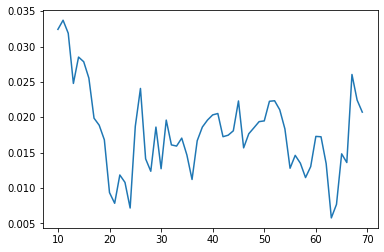

In [83]:
mean_df = pd.DataFrame.from_dict(mean,orient='index')
#mean_df['x (um, imageStack)']
sns.lineplot(y=np.arctan2(mean_df['y (um, imageStack)'], mean_df['x (um, imageStack)'])[10:70],x=range(90)[10:70])

In [89]:
theta = np.arctan2(mean_df['y (um, imageStack)'], mean_df['x (um, imageStack)'])[10:70]

In [110]:
theta.mean()
c,s = np.cos(theta.mean()),np.sin(theta.mean())
R = np.array(((c,s),(-s,c)))
print(R)

[[ 0.99984004  0.01788562]
 [-0.01788562  0.99984004]]


In [108]:
mean_df.loc['25']

x (um, imageStack)    4.359851
y (um, imageStack)    0.081680
z (um, imageStack)   -0.566750
Name: 25, dtype: float64

In [111]:
R.dot(np.array((4.359851, 0.081680)))

array([4.36061449e+00, 3.68831304e-03])

In [112]:
# from manual tracking a single bead attached to the grid in FJIJ
p0 = (658.2,1001.5)
p1 = (659.3, 1061.17)
np.arctan2(0.115*(659.3-658.2), 0.115*(1061.17 - 1001.5))

0.018432636462981405

In [121]:
tmp = mean_df[['x (um, imageStack)','y (um, imageStack)']]
tmp

,"x (um, imageStack)","y (um, imageStack)"
0,0.000000,0.000000
1,0.097546,0.078215
2,0.310682,0.035343
3,0.504332,0.028820
4,0.670207,0.037819
...,...,...
85,0.268719,-0.015497
86,0.263779,0.014784
87,0.283185,-0.001862
88,0.271497,0.008562


In [352]:
def rotate(rotMat,p,paraOrPerp = 'para'):
    x,y = R.dot(p)
    if paraOrPerp == 'para': return x
    elif paraOrPerp == 'perp': return y
    else: return x,y
par =tmp.apply(lambda p: rotate(R,(p['x (um, imageStack)'],p['y (um, imageStack)']),paraOrPerp='para'),axis=1)
perp = tmp.apply(lambda p: rotate(R,(p['x (um, imageStack)'],p['y (um, imageStack)']),paraOrPerp='perp'),axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

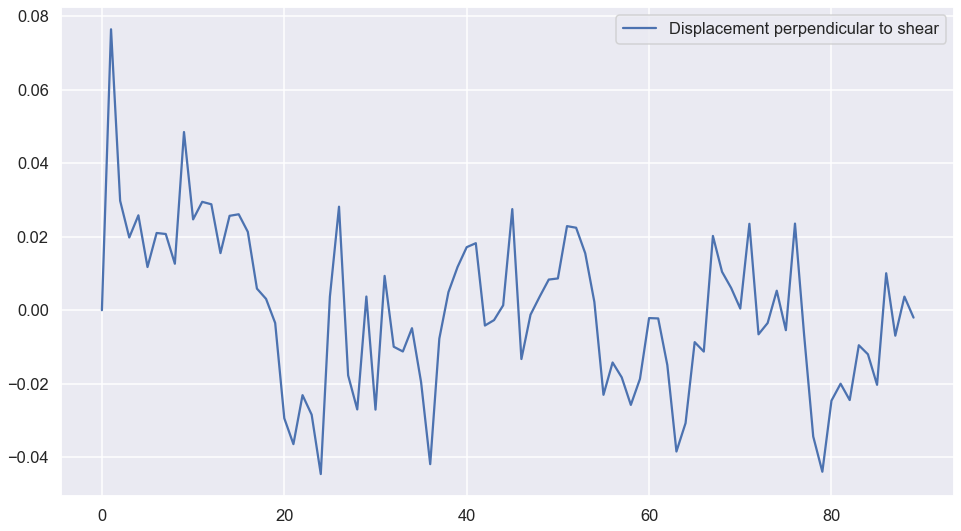

In [187]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context("talk") 
#g = sns.lineplot(y=par, x=range(90),label='Shear displacement')
g=sns.lineplot(y=perp,x=range(90), label = 'Displacement perpendicular to shear')
g.legend()


In [188]:
# now apply the same rotation matrix to the gel positions
flag = 'perp'
t=40
gel0 = gelPos.xs(0,level='frame').apply(lambda p: 
                                 rotate(R,
                                        (p['x (um, imageStack)'],p['y (um, imageStack)']),
                                        paraOrPerp = flag),
                                 axis=1)
gel40 = gelPos.xs(t,level='frame').apply(lambda p: 
                                 rotate(R,
                                        (p['x (um, imageStack)'],p['y (um, imageStack)']),
                                        paraOrPerp = flag),
                                 axis=1)
gelDisp = gel40-gel0

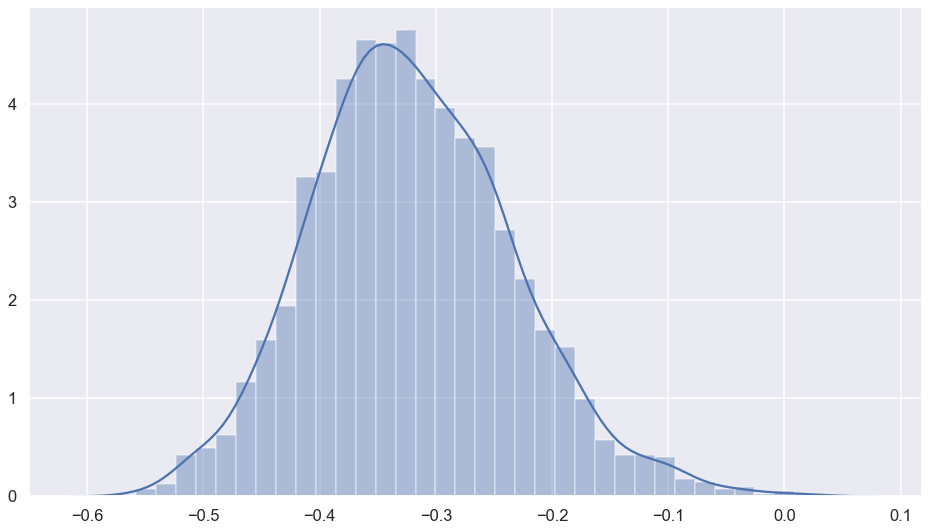

In [189]:
sns.distplot(gelDisp.dropna())

In [179]:
pos_keyList = ['x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)']
(gelPos.loc[89,pos_keyList] - gelPos.loc[0,pos_keyList]).dropna().apply(lambda p: 
                                 rotate(R,
                                        (p['x (um, imageStack)'],p['y (um, imageStack)']),
                                        paraOrPerp = flag),
                                 axis=1)

particle
3      -0.326820
4      -0.419096
5      -0.407815
6      -0.377657
7      -0.471586
          ...   
3154   -0.678949
3158   -0.704007
3159   -0.618503
3166   -0.703790
3167   -0.613404
Length: 2223, dtype: float64

In [175]:
gelPos.xs(0,level='frame')

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,"z (um, below gel)"
particle,,,,,,,
0,11.061014,17.360880,4.273772,0.161318,0.154410,0.141765,-19.956049
1,28.329169,44.502572,5.451974,0.185608,0.193725,0.132625,-19.144314
2,4.535116,30.755712,5.776501,0.166145,0.159693,0.137178,-18.702330
3,29.681689,13.350886,5.578862,0.177129,0.204540,0.176749,-18.500928
4,6.492181,34.793476,6.180907,0.156805,0.164460,0.143846,-18.355213
...,...,...,...,...,...,...,...
3165,205.852231,215.517305,13.016421,0.284404,0.282810,0.299678,-13.577680
3166,223.868141,229.844683,23.776225,0.111443,0.116534,0.088651,-2.971014
3167,197.364440,201.825359,24.349485,0.155706,0.155696,0.123837,-2.058735


In [205]:
reload(da)
gelStrain = da.gelStrain(gelPos,0.15*(937-163),R=R,frame=range(90))


In [459]:
0.15*(921-157)
0.15*(937-163)

116.1

In [460]:
gelStrain_offset2 = da.gelStrain(gelPos,0.15*(921-157),R=R,frame=range(90))

In [203]:
R

array([[ 0.99984004,  0.01788562],
       [-0.01788562,  0.99984004]])

In [202]:
gelStrain.head(20)

Ref Pos      (0,0)      (0,1)      (0,2)
particle value                                                              
0        x (um, imageStack)       11.061014   0.000000   0.009509   0.169471
         y (um, imageStack)       17.360880   0.000000  -0.019537   0.000999
         z (um, imageStack)        4.273772   0.000000  -0.045735  -0.168559
         e_xz                      0.000000   0.000000   0.000079   0.001408
         e_yz                      0.000000   0.000000  -0.000162   0.000008
         e_zz                      0.000000   0.000000  -0.000380  -0.001400
         x (um, shearCoord para)   0.000000   0.000000   0.009159   0.169462
         y (um, shearCoord perp)   0.000000   0.000000  -0.019704  -0.002032
         e_para                    0.000000   0.000000   0.000076   0.001408
         e_perp                    0.000000   0.000000  -0.000164  -0.000017
         z (um, below gel)       -19.956049 -19.956049 -20.199734 -20.102573
1        x (um, imageStack)       28.329169   0.000000  -0.014817   0.155347
         y (um, imageStack)       44.502572   0.000000  -0.036974   0.002811
         z (um, imageStack)        5.451974   0.000000   0.014462  -0.040362
         e_xz                      0.000000   0.000000  -0.000122   0.001278
         e_yz                      0.000000   0.000000  -0.000304   0.000023
         e_zz                      0.000000   0.000000   0.000119  -0.000332
         x (um, shearCoord para)   0.000000   0.000000  -0.015476   0.155373
         y (um, shearCoord perp)   0.000000   0.000000  -0.036703   0.000032
         e_para                    0.000000   0.000000  -0.000127   0.001278

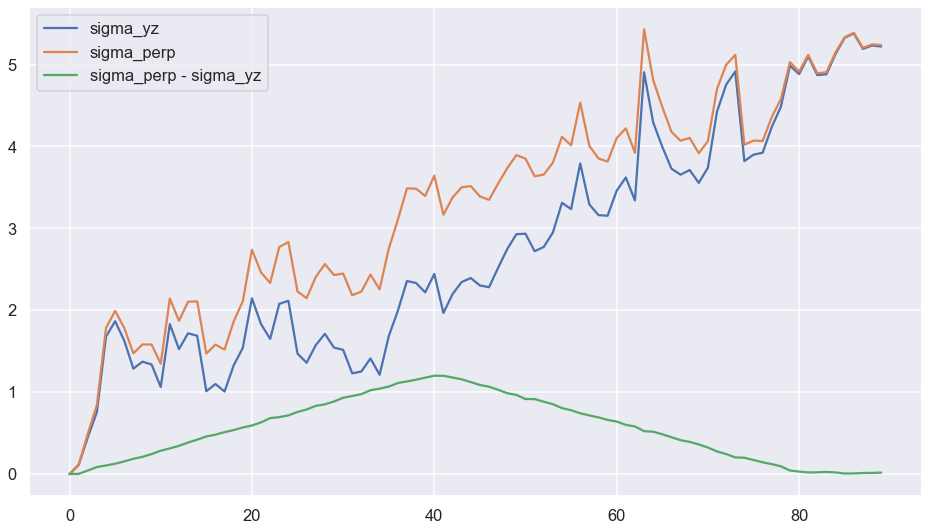

In [230]:
# normalize and plot distribution of normalized components as a function of time. 
resid = -1500*gelStrain.xs('e_perp',level='value').mean().to_numpy()[1:] + 1500*gelStrain.xs('e_yz',level='value').mean().to_numpy()[1:]
sns.lineplot(y=-1500*gelStrain.xs('e_yz',level='value').mean().to_numpy()[1:], x=range(90),label='sigma_yz')
sns.lineplot(y=-1500*gelStrain.xs('e_perp',level='value').mean().to_numpy()[1:], x=range(90),label='sigma_perp')
sns.lineplot(y=resid,x=range(90),label = 'sigma_perp - sigma_yz')

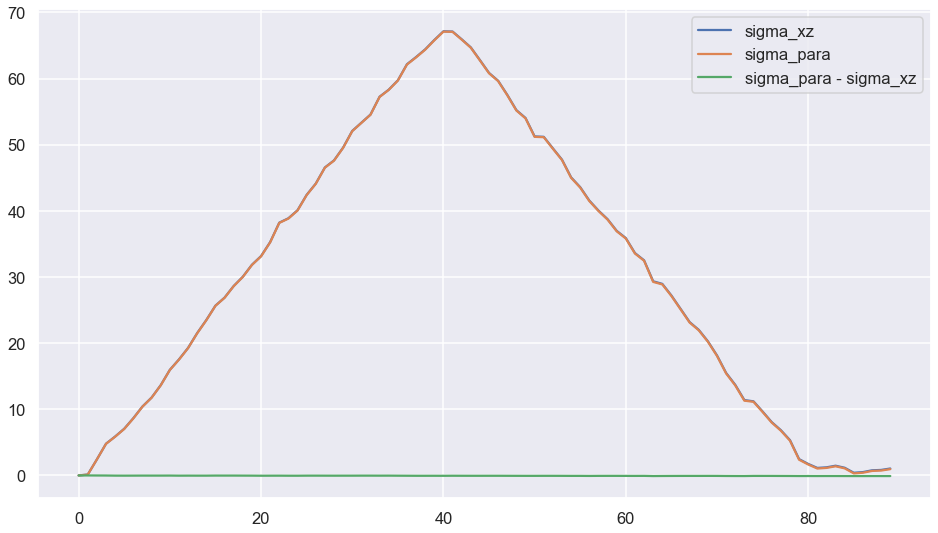

In [232]:
# normalize and plot distribution of normalized components as a function of time. 
residPara = 1500*gelStrain.xs('e_para',level='value').mean().to_numpy()[1:] - 1500*gelStrain.xs('e_xz',level='value').mean().to_numpy()[1:]
sns.lineplot(y=1500*gelStrain.xs('e_xz',level='value').mean().to_numpy()[1:], x=range(90),label='sigma_xz')
sns.lineplot(y=1500*gelStrain.xs('e_para',level='value').mean().to_numpy()[1:], x=range(90),label='sigma_para')
sns.lineplot(y=residPara,x=range(90),label = 'sigma_para - sigma_xz')

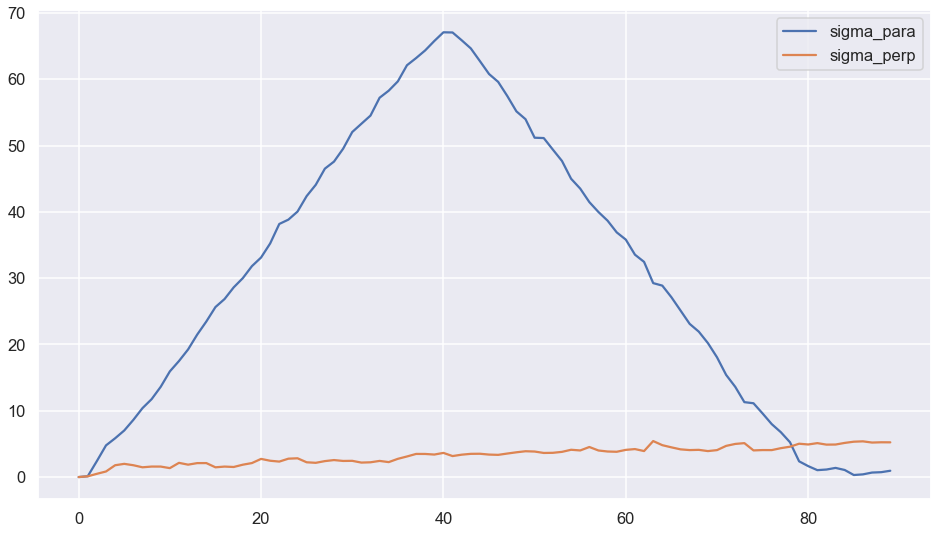

In [234]:
sns.lineplot(y=1500*gelStrain.xs('e_para',level='value').mean().to_numpy()[1:], x=range(90),label='sigma_para')
sns.lineplot(y=-1500*gelStrain.xs('e_perp',level='value').mean().to_numpy()[1:], x=range(90),label='sigma_perp')

In [ ]:
# compute the rotation matrix. 

## Compute strain in rotated configuration

In [267]:
# Create a function to rotate a position dataFrame in xy
pos10 = sedPos.xs(10,level='frame')[['x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)']]
idx = pos10.index

In [280]:
tmp = pos10.join(
    pd.DataFrame(
        pos10[['x (um, imageStack)', 'y (um, imageStack)']].to_numpy().dot(R.T),
        columns=['x (um, shear para)', 'y (um, shear perp)'],index=pd.MultiIndex.from_product([[10],idx])))

In [285]:
pd.DataFrame(
        pos10[['x (um, imageStack)', 'y (um, imageStack)']].to_numpy().dot(R.T),
        columns=['x (um, shear para)', 'y (um, shear perp)'],index=pd.MultiIndex.from_product([[10],idx]))

x (um, shear para)  y (um, shear perp)
   particle                                        
10 24                 32.806939            6.763407
   32                 45.451868            8.704251
   36                 39.343631            9.819400
   40                 29.525078           12.003640
   42                 40.195056           12.951299
...                         ...                 ...
   1020628           192.817420          196.654477
   1020629           198.103949          193.047111
   1020630           191.205540          196.860301
   1020631           193.988099          197.644259
   1020632           221.397362          199.872375

[970186 rows x 2 columns]

In [306]:
pos0 = sedPos.xs(0,level='frame')[['x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)']]
idx0 = pos0.index
out = pos0.join( pd.DataFrame( pos0[['x (um, imageStack)', 'y (um, imageStack)']].to_numpy().dot(R.T), columns=['x (um, shear para)', 'y (um, shear perp)'],index=pd.MultiIndex.from_product([[0],idx0],names=['frame','particle'])) )

for t in range(1,90):
    if t % 10 == 0: print(t)
    pos_img = sedPos.xs(t,level='frame')[['x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)']]
    idx = pos_img.index
    pos_rot = pos_img.join(
        pd.DataFrame(
            pos_img[['x (um, imageStack)', 'y (um, imageStack)']].to_numpy().dot(R.T),
            columns=['x (um, shear para)', 'y (um, shear perp)'],
            index=pd.MultiIndex.from_product([[t],idx], names=['frame', 'particle'])))
    out = pd.concat([out,pos_rot])

out

10
20
30
40
50
60
70
80


x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  23.480112            2.221875           27.385583   
      1                  31.531264            2.180390           27.351286   
      2                  37.789111            2.119240           27.275850   
      3                  39.408522            2.436315           27.277841   
      4                  35.347537            2.748365           27.335966   
...                            ...                 ...                 ...   
89    1489977           200.492249          221.169243           71.848828   
      1489978           187.204307          202.418158           83.305471   
      1489979           188.845862          225.415862           83.684483   
      1489980           193.989494          194.780281           83.924158   
      1489981           186.063189          201.029539           85.103917   

                x (um, shear para)  y (um, shear perp)  
frame particle                                          
0     0                  23.516095            1.801564  
      1                  31.565218            1.616085  
      2                  37.820971            1.443019  
      3                  39.445794            1.731080  
      4                  35.391039            2.115713  
...                            ...                 ...  
89    1489977           204.415927          217.547937  
      1489978           190.794735          199.037515  
      1489979           192.847356          222.002180  
      1489980           197.442229          191.279502  
      1489981           189.628964          197.669528  

[87508017 rows x 5 columns]

In [315]:
reload(da)

<module 'data_analysis.static' from '/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py'>

In [316]:
shear_keys={'x':'x (um, shear para)', 'y': 'y (um, shear perp)', 'z': 'z (um, imageStack)'}
sedPos_strain_shearCoord = da.makeLocalStrainTraj(out,list(zip([0 for n in range(90)],[n for n in range(2,90)])),pos_keys = shear_keys,verbose=True )

/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py:472: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  try: epsilon = X @ np.transpose(np.linalg.inv(Y)) - np.identity(3)
/Users/zsolt/opt/anaconda3/lib/python3.7/site-packages/numba/typing/npydecl.py:958: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


Starting 0 entry in list of len 88
Starting 1 entry in list of len 88
Starting 2 entry in list of len 88
Starting 3 entry in list of len 88
Starting 4 entry in list of len 88
Starting 5 entry in list of len 88
Starting 6 entry in list of len 88
Starting 7 entry in list of len 88
Starting 8 entry in list of len 88
Starting 9 entry in list of len 88
Starting 10 entry in list of len 88
Starting 11 entry in list of len 88
Starting 12 entry in list of len 88
Starting 13 entry in list of len 88
Starting 14 entry in list of len 88
Starting 15 entry in list of len 88
Starting 16 entry in list of len 88
Starting 17 entry in list of len 88
Starting 18 entry in list of len 88
Starting 19 entry in list of len 88
Starting 20 entry in list of len 88
Starting 21 entry in list of len 88
Starting 22 entry in list of len 88
Starting 23 entry in list of len 88
Starting 24 entry in list of len 88
Starting 25 entry in list of len 88
Starting 26 entry in list of len 88
Starting 27 entry in list of len 88
St

In [319]:
# Save the strain to hdf5 for archiving
hdf_stem = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/locations_stitch/'
sedStrain_shearCoord_traj = 'tfrGel10212018A_shearRun10292018f_sed_strainTrajZeroRef_shearCoord.h5'
sedPos_strain_shearCoord.to_hdf(hdf_stem + sedStrain_shearCoord_traj,'sedStrain_shearCoord_traj')

## Compare the volume avg strains to boundary applied strains in perp and para directions. 

In [429]:
# select for sufficiently large number of nnb
# compute the mean, descriptive statistics. 
# plot as a function of frame number, multiplied by 200
nnb_min = 0
out_exz = {}
out_eyz = {}
for t in range(1,90):
    t_str = '(0,{})'.format(t)
    tmp = sedPos_strain_shearCoord[t_str].dropna()
    tmp_idx = tmp.xs('nnb count', level='values') >= nnb_min
    #sns.distplot(tmp.xs('exz',level='values').loc[tmp_idx],kde=False)
    #tmp.xs('exz',level='values').loc[tmp_idx].describe()
    out_exz[str(t)] = tmp.xs('exz',level='values').loc[tmp_idx].describe()
    out_eyz[str(t)] = tmp.xs('eyz',level='values').loc[tmp_idx].describe()

# nnb_min = 9
#strainStat_exz = pd.DataFrame(out_exz)
#strainStat_eyz = pd.DataFrame(out_eyz)

# nnb_min = 4
#strainStat_exz_nnb4 = pd.DataFrame(out_exz)
#strainStat_eyz_nnb4 = pd.DataFrame(out_eyz)

# nnb_min = 0 (no nnb selection)
strainStat_exz_nnb0 = pd.DataFrame(out_exz)
strainStat_eyz_nnb0 = pd.DataFrame(out_eyz)

In [425]:
strainStat_exz

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
count,949650.000000,946809.000000,944554.000000,943032.000000,941570.000000,940291.000000,938831.000000,937639.000000,936429.000000,935083.000000,...,892330.000000,892154.000000,891994.000000,891848.000000,891705.000000,891505.000000,891373.000000,891235.000000,891076.000000,890920.000000
mean,0.000760,0.000683,0.000496,0.001111,0.001395,0.001598,0.001702,0.002236,0.002128,0.001855,...,0.001132,0.001536,0.001346,0.001305,0.001423,0.001678,0.001666,0.001577,0.001478,0.001410
std,0.007242,0.007535,0.007676,0.007743,0.007917,0.008059,0.008181,0.008349,0.008474,0.008538,...,0.015606,0.015707,0.015775,0.015848,0.015934,0.016020,0.016100,0.016144,0.016208,0.016265
min,-0.217871,-0.145581,-0.218531,-0.247411,-0.255966,-0.250845,-0.220027,-0.210885,-0.245979,-0.226513,...,-0.453948,-0.456347,-0.501251,-0.488884,-0.488667,-0.461232,-0.463148,-0.471116,-0.485015,-0.484677
25%,-0.003689,-0.003941,-0.004174,-0.003593,-0.003383,-0.003234,-0.003203,-0.002784,-0.002926,-0.003213,...,-0.006930,-0.006567,-0.006817,-0.006920,-0.006831,-0.006610,-0.006623,-0.006762,-0.006874,-0.006993
50%,0.000768,0.000685,0.000521,0.001118,0.001405,0.001601,0.001700,0.002233,0.002121,0.001842,...,0.000959,0.001346,0.001135,0.001084,0.001218,0.001469,0.001484,0.001364,0.001277,0.001184
75%,0.005220,0.005297,0.005188,0.005813,0.006196,0.006454,0.006620,0.007246,0.007170,0.006917,...,0.008973,0.009400,0.009268,0.009266,0.009395,0.009693,0.009754,0.009665,0.009587,0.009543
max,0.126023,0.115775,0.122105,0.135390,0.214327,0.153827,0.145630,0.156554,0.227679,0.166217,...,0.433741,0.420249,0.388799,0.402343,0.398767,0.437627,0.481004,0.495774,0.468175,0.381632


In [428]:
strainStat_exz_nnb4

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
count,962217.000000,959607.000000,957534.000000,956094.000000,954772.000000,953532.000000,952148.000000,951013.000000,949819.000000,948489.000000,...,907624.000000,907458.000000,907311.000000,907180.000000,907045.000000,906866.000000,906733.000000,906591.000000,906444.000000,906294.000000
mean,0.000764,0.000686,0.000490,0.001120,0.001399,0.001601,0.001698,0.002240,0.002127,0.001861,...,0.001140,0.001548,0.001352,0.001310,0.001429,0.001674,0.001671,0.001589,0.001478,0.001419
std,0.007629,0.008011,0.008050,0.008449,0.008186,0.008403,0.008536,0.008788,0.008853,0.009220,...,0.017681,0.017865,0.017860,0.018717,0.018507,0.017996,0.018275,0.018787,0.018698,0.019275
min,-1.141541,-1.408760,-1.074077,-0.971009,-0.835279,-0.613736,-1.291919,-1.229460,-1.356129,-1.914600,...,-2.420282,-2.387631,-3.509670,-3.244509,-2.977926,-2.812974,-3.127722,-3.229396,-5.037039,-4.226758
25%,-0.003713,-0.003969,-0.004205,-0.003619,-0.003413,-0.003265,-0.003237,-0.002813,-0.002958,-0.003241,...,-0.006986,-0.006624,-0.006877,-0.006981,-0.006893,-0.006675,-0.006687,-0.006816,-0.006936,-0.007053
50%,0.000772,0.000688,0.000519,0.001124,0.001407,0.001602,0.001698,0.002236,0.002121,0.001846,...,0.000957,0.001349,0.001134,0.001080,0.001217,0.001464,0.001485,0.001365,0.001276,0.001184
75%,0.005252,0.005332,0.005218,0.005851,0.006232,0.006488,0.006653,0.007284,0.007205,0.006956,...,0.009028,0.009459,0.009325,0.009322,0.009455,0.009749,0.009816,0.009728,0.009647,0.009602
max,0.482456,0.464596,0.388678,2.395638,0.216051,0.934917,0.453870,0.379206,0.346374,0.639783,...,3.294655,3.922032,3.046814,4.376094,4.209080,2.142631,2.660793,4.830965,1.899320,5.531880


In [430]:
strainStat_exz_nnb0

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
count,962242.000000,959635.000000,957562.000000,956120.000000,954797.000000,953560.000000,952173.000000,951042.000000,949848.000000,948518.000000,...,907735.000000,907570.000000,907424.000000,907291.000000,907156.000000,906979.000000,906847.000000,906708.000000,906562.000000,906412.000000
mean,0.000709,0.000696,0.000462,0.001130,0.001397,0.001616,0.001724,0.002254,0.002314,0.001937,...,0.001167,0.001557,0.001310,0.001407,0.001355,0.001613,0.001582,0.001535,0.001348,0.001378
std,0.035398,0.015071,0.019769,0.013090,0.021957,0.022361,0.033930,0.026269,0.158837,0.044248,...,0.119363,0.092689,0.067908,0.108950,0.048451,0.074376,0.095106,0.079697,0.094911,0.071122
min,-32.467820,-5.903373,-12.425507,-1.474994,-12.463017,-8.962967,-11.074857,-6.861199,-7.937131,-4.114739,...,-42.892459,-33.158608,-35.632687,-37.588466,-18.602858,-31.486227,-56.608679,-46.361330,-76.881640,-26.233040
25%,-0.003714,-0.003970,-0.004205,-0.003619,-0.003413,-0.003265,-0.003237,-0.002813,-0.002958,-0.003242,...,-0.006987,-0.006626,-0.006878,-0.006982,-0.006894,-0.006676,-0.006688,-0.006817,-0.006937,-0.007054
50%,0.000772,0.000688,0.000519,0.001124,0.001407,0.001602,0.001698,0.002236,0.002121,0.001846,...,0.000957,0.001349,0.001134,0.001080,0.001217,0.001464,0.001485,0.001365,0.001276,0.001184
75%,0.005252,0.005332,0.005218,0.005851,0.006232,0.006488,0.006653,0.007284,0.007205,0.006956,...,0.009029,0.009460,0.009326,0.009324,0.009456,0.009750,0.009817,0.009730,0.009648,0.009604
max,1.808422,6.038794,6.026961,8.182272,13.354349,14.177950,23.029911,14.621614,151.693281,33.558595,...,87.780698,73.274152,19.372592,80.650979,11.029857,22.948739,13.770178,33.476552,19.549624,31.561857


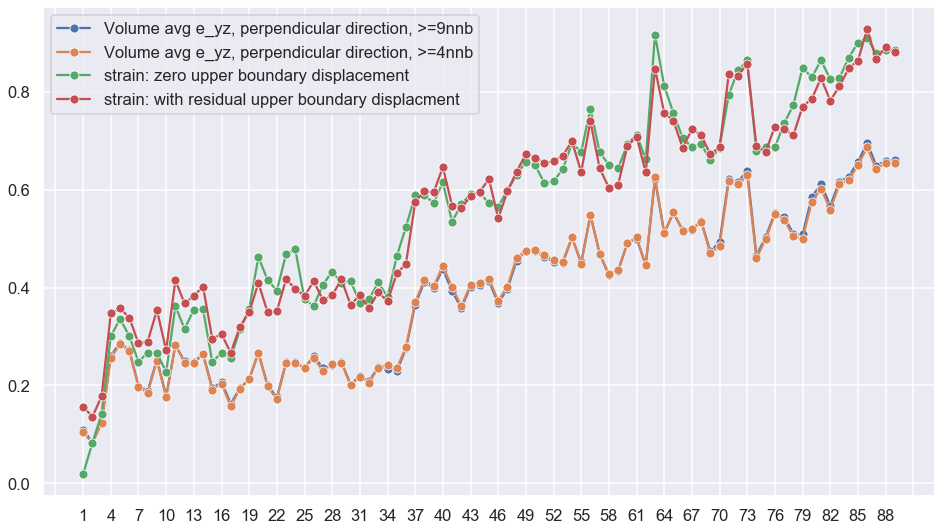

In [457]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(rc={'figure.figsize':(16,9)})
sns.set_context("talk")
#sns.lineplot(data = 200*strainStat_exz.loc['mean'], sort=False,marker='o',label='Volume avg, shear direction')
g = sns.lineplot(data = 200*strainStat_eyz.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, >=9nnb')
g = sns.lineplot(data = 200*strainStat_eyz_nnb4.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, >=4nnb')
#g = sns.lineplot(data = 200*strainStat_eyz_nnb0.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, no nnb cutoff')
sns.lineplot(y=(0 - 140.7*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89),marker='o', label='strain: zero upper boundary displacement')
sns.lineplot(y=(perp[1:] - 140.7*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89), marker='o', label='strain: with residual upper boundary displacment')
g.xaxis.set_major_locator(ticker.MultipleLocator(3))

### Notes on strain measures
- Is there a chance that by removing low coordination particles, I have artificially reduced the volume average strain? 
- There is defintely a problem with very low coordination particles skewing the mean, however perhaps restricting particles to have more than 9 nnb over the two configurations used in the strain is too restrictive
- Perhaps I am somehow dropping the plasticlly strained particles.
- Maybe the best thing is to require that the particle has a certain number of nnb in the current configuration and the initial configuation. 
- Also, waht does this procedure look like on the in shear direction? Perhaps the same restriction of > 9 nnb is going to remove the spike and artifacts, but also create systematic deviations between the strain measures.
- How many particles am I removing? What is the strain distribution of those particles? 

#### Results
- Hmmm this didnt pan out. The low coordination cutoff are good, necessary, and easy to pick; anything abouve 4 seems to work fine. 9 is probably even better as the max strain values are not that high. 
- The nnb count is, in words, "the number of nearest neighbors that are in both ref and current cofigurations" and so I cut off of 4 on nnb means that only consider particles that have at least 4 nnb in both ref and cur configurations. 
- The displacement of the gel is a bit trickier to get right. Previously I was directly using the displacement of the tracers near the surface and got good agreement. Now, I am computing the avg strain in the gel and positing a total gel thickness to get the displacement of the top surface. This leads to discrepancies between the vol avg and boundary strains. A closer match is obtained with gel thickness of 140.7 as opposed to 145. 
- the gel strain code as well has a problem in the I currently set the offset by matching slice numbers, but this is only partially correct. I need to set the offset by matching slice numbers and subtracting where I think the top of the coverslip, which importantly is not at the bottom of the imaging stack. 

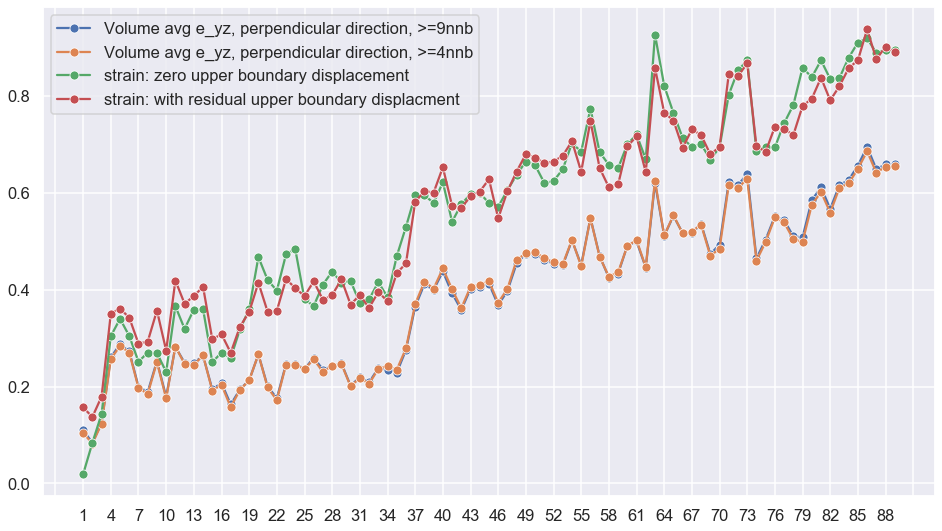

In [461]:
# recompute gel strain with corrected thickness (or an attempt at corrected thickness)
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context("talk")
#sns.lineplot(data = 200*strainStat_exz.loc['mean'], sort=False,marker='o',label='Volume avg, shear direction')
g = sns.lineplot(data = 200*strainStat_eyz.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, >=9nnb')
g = sns.lineplot(data = 200*strainStat_eyz_nnb4.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, >=4nnb')
#g = sns.lineplot(data = 200*strainStat_eyz_nnb0.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, no nnb cutoff')
sns.lineplot(y=(0 - 140.7*gelStrain_offset2.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89),marker='o', label='strain: zero upper boundary displacement')
sns.lineplot(y=(perp[1:] - 140.7*gelStrain_offset2.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89), marker='o', label='strain: with residual upper boundary displacment')
g.xaxis.set_major_locator(ticker.MultipleLocator(3))

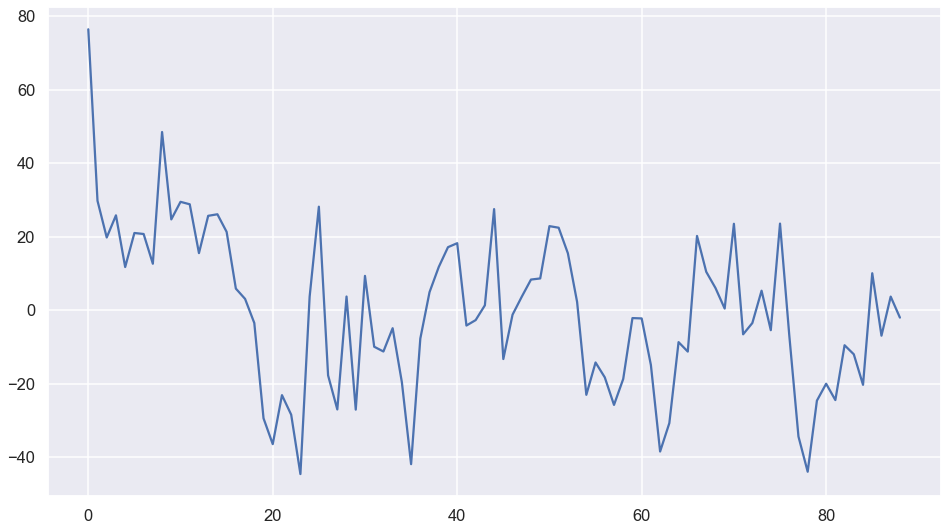

In [488]:
sns.lineplot(y=1000*perp[1:],x=range(89))

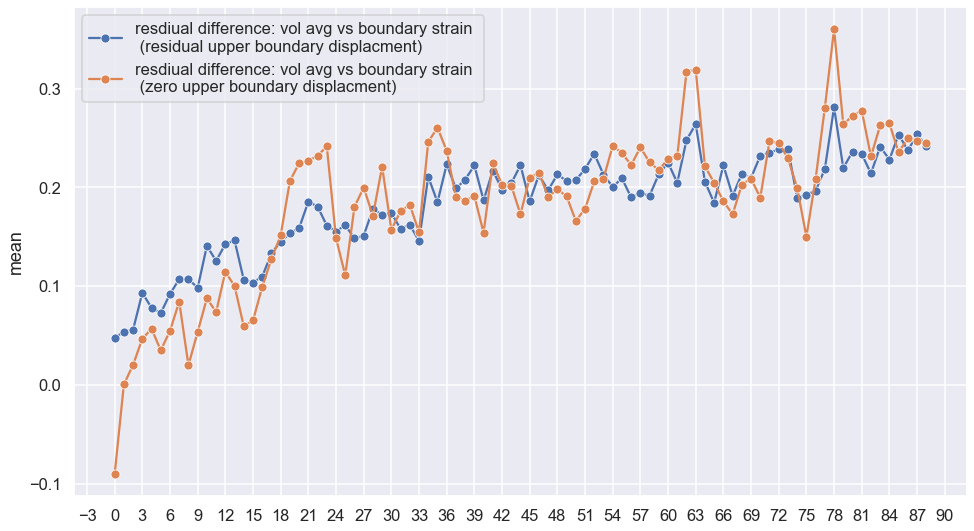

In [424]:
diff_perp = (perp[1:] - 144*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100 - 200*strainStat_eyz.loc['mean']
diff_zero = (0 - 144*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100 - 200*strainStat_eyz.loc['mean']
g = sns.lineplot(y=diff_perp, x=range(89),marker='o',label='resdiual difference: vol avg vs boundary strain \n (residual upper boundary displacment) ')
sns.lineplot(y=diff_zero, x=range(89),marker='o',label='resdiual difference: vol avg vs boundary strain \n (zero upper boundary displacment)')
g.xaxis.set_major_locator(ticker.MultipleLocator(3))

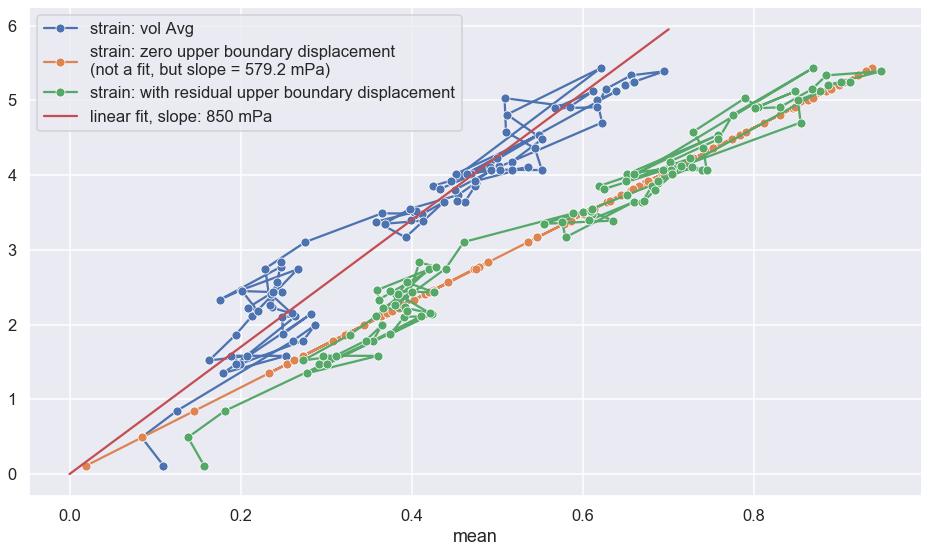

In [421]:
stress_perp = -1500*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:]
strain_perpBoundary = 100*(perp[1:] - 144*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)
strain_perpVolAvg = 200*strainStat_eyz.loc['mean']
strain_perpBoundary_noMotion = 100*(0 - 144*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)
sns.lineplot(y=stress_perp, x=strain_perpVolAvg,sort=False,marker='o',label='strain: vol Avg')

sns.lineplot(y=stress_perp, x=strain_perpBoundary_noMotion,sort=False,marker='o',label ='strain: zero upper boundary displacement \n(not a fit, but slope = 579.2 mPa)')
sns.lineplot(y=stress_perp, x=strain_perpBoundary,sort=False,marker='o', label ='strain: with residual upper boundary displacement')
sns.lineplot(y=np.array([0,5.1,5.95]), x=[0,0.6,0.7],label='linear fit, slope: 850 mPa')

In [395]:
# What's modulus in perp flow?
(stress_perp[1] - stress_perp[0])/(strain_perpBoundary_noMotion[1]/100 - strain_perpBoundary_noMotion[0]/100)

579.2291666666667

In [413]:
(5.1)/(0.6/100)

849.9999999999999

In [415]:
5.1/0.6*0.7

5.949999999999999

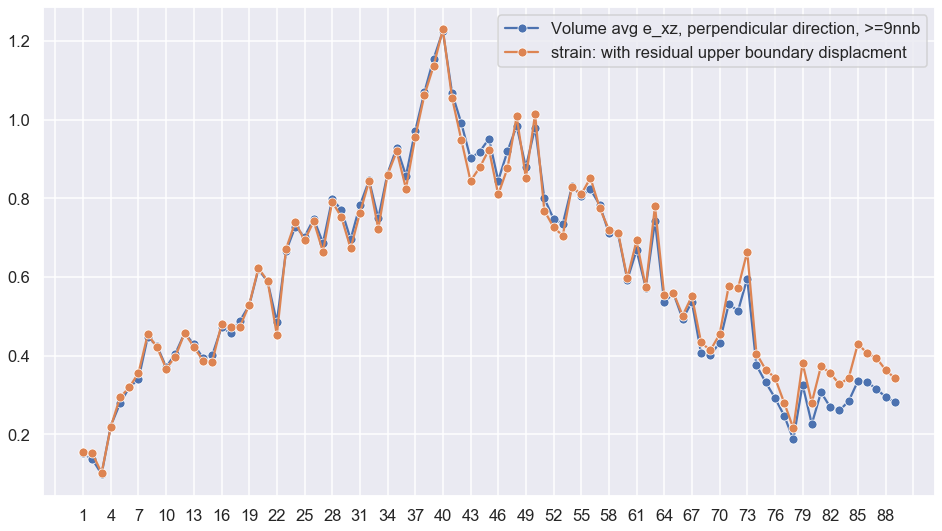

In [456]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context("talk")
#sns.lineplot(data = 200*strainStat_exz.loc['mean'], sort=False,marker='o',label='Volume avg, shear direction')
g = sns.lineplot(data = 200*strainStat_exz.loc['mean'], sort=False,marker='o', label = 'Volume avg e_xz, perpendicular direction, >=9nnb')
#g = sns.lineplot(data = 200*strainStat_exz_nnb4.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, >=4nnb')
#g = sns.lineplot(data = 200*strainStat_eyz_nnb0.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, no nnb cutoff')
#sns.lineplot(y=(0 - 144*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89),marker='o', label='strain: zero upper boundary displacement')
sns.lineplot(y=(par[1:] - 140.7*gelStrain.xs('e_para',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89), marker='o', label='strain: with residual upper boundary displacment')
g.xaxis.set_major_locator(ticker.MultipleLocator(3))

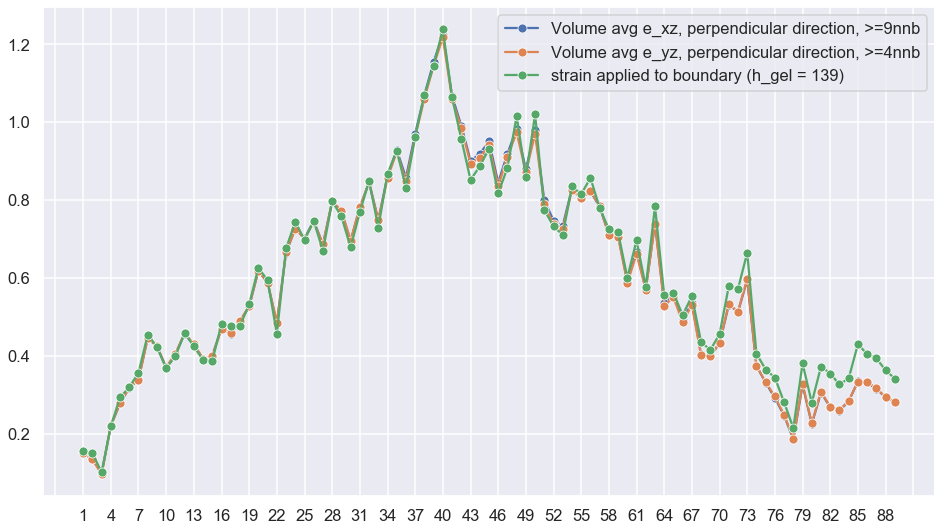

In [490]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context("talk")
#sns.lineplot(data = 200*strainStat_exz.loc['mean'], sort=False,marker='o',label='Volume avg, shear direction')
g = sns.lineplot(data = 200*strainStat_exz.loc['mean'], sort=False,marker='o', label = 'Volume avg e_xz, perpendicular direction, >=9nnb')
g = sns.lineplot(data = 200*strainStat_exz_nnb4.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, >=4nnb')
#g = sns.lineplot(data = 200*strainStat_exz_nnb0.loc['mean'], sort=False,marker='o', label = 'Volume avg e_yz, perpendicular direction, no nnb cutoff')
#sns.lineplot(y=(0 - 144*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89),marker='o', label='strain: zero upper boundary displacement')
sns.lineplot(y=(par[1:] - 139*gelStrain_offset2.xs('e_para',level='value').mean().to_numpy()[2:])/(83.954-28.348)*100, x=range(89), marker='o', label='strain applied to boundary (h_gel = 139)')
g.xaxis.set_major_locator(ticker.MultipleLocator(3))

## Comments
- the gel thickness is between 0.15 * 930 and 0.15 * 968
- my best guess for the thickness in the middle is 0.15*942 = 141.3 um
- low end: 0.15*930 = 139.5
- high end: 0.15*968 = 145
- best match between strain measures: 139

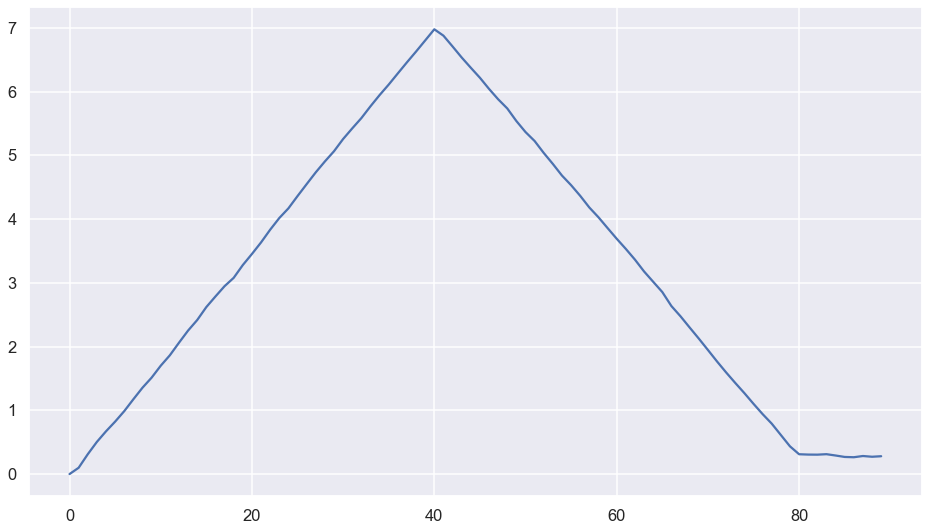

In [492]:
sns.lineplot(y=par,x=range(90))

In [471]:
0.15*968

145.2

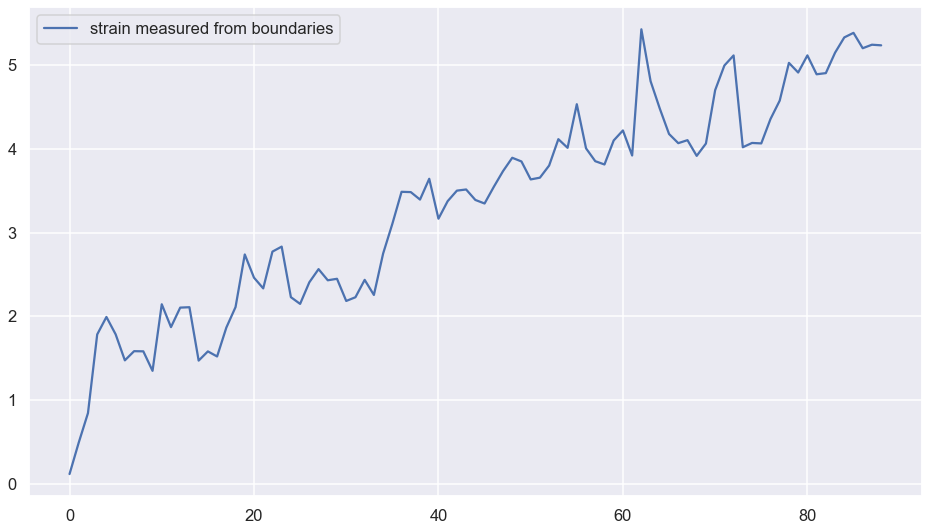

In [355]:
sns.lineplot(y=-1500*gelStrain.xs('e_perp',level='value').mean().to_numpy()[2:], x=range(89),label='stress')

## SCRATCH

In [ ]:
R.dot(np.array((23.480112, 2.221875)))

In [251]:
np.array((23.480112, 2.221875)).dot(R.T)

array([23.51609571,  1.80156332])

In [255]:
R.dot(np.array((1,0)))

array([ 0.99984004, -0.01788562])

In [256]:
shear_imgCoord = np.array((0.115*(1061.167 - 1001.50), 0.115*(659.333-658.167)))
R.dot(shear_imgCoord)

array([6.86300568, 0.01134273])

In [257]:
shear_imgCoord

array([6.861705, 0.13409 ])

In [258]:
shear_imgCoord.dot(R.T)

array([6.86300568, 0.01134273])